In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
Data = pd.read_csv('/content/drive/MyDrive/Working Space/Data_coffee/Data_coffee_complete_correlationWithGroup.csv')
Data

,field1,Name,NewCode,code,Groupping,Sweetness,L,A,B,Total_phenol,...,Serine,alanine,glycine,threonine,glutamic_acid,proline,histidine,arginine,leucine,phynylalanine
0,0,DC1,DC8001-1,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
1,1,DC1,DC8001-2,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
2,2,DC1,DC8001-3,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
3,3,DC1,DC8001-4,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
4,4,DC1,DC8001-5,F1,1,17.5,44.83,0.45,11.11,2.56,...,104.17,203.30,13.49,26.27,410.72,48.40,26.76,136.15,52.01,61.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,221,BK1,BK-10001-2,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
65,222,BK1,BK-10001-3,F48,6,15.0,49.48,1.25,11.67,0.94,...,185.40,417.97,25.97,44.10,457.11,63.88,37.02,381.68,74.05,152.09
66,225,BK3,BK-10003-1,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61
67,226,BK3,BK-10003-2,F50,6,17.0,52.42,0.81,12.40,1.99,...,187.75,396.23,36.27,45.11,317.60,67.28,52.47,295.35,68.86,139.61


In [8]:
feature = ['Zn',
 'Na',
 'Malic_acid',
 'Total_Flavonoid',
 'Total_phenol',
 'Propionic_acid',
 'Quinic_acid']
feature

['Zn',
 'Na',
 'Malic_acid',
 'Total_Flavonoid',
 'Total_phenol',
 'Propionic_acid',
 'Quinic_acid']

In [9]:
feature_corr = Data[feature].corr()
feature_uncorr = feature_corr.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) <= 0.05 else 'background-color: white')
feature_uncorr

,Zn,Na,Malic_acid,Total_Flavonoid,Total_phenol,Propionic_acid,Quinic_acid
Zn,1.000000,0.687805,0.100253,0.210569,0.392398,0.365873,0.360525
Na,0.687805,1.000000,0.562173,0.604402,0.460048,0.566335,0.707948
Malic_acid,0.100253,0.562173,1.000000,0.888909,0.444477,0.847031,0.680238
Total_Flavonoid,0.210569,0.604402,0.888909,1.000000,0.785574,0.767405,0.503749
Total_phenol,0.392398,0.460048,0.444477,0.785574,1.000000,0.441051,0.036784
Propionic_acid,0.365873,0.566335,0.847031,0.767405,0.441051,1.000000,0.779705
Quinic_acid,0.360525,0.707948,0.680238,0.503749,0.036784,0.779705,1.000000


In [10]:
X = Data[feature]
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [11]:
pca = PCA(n_components=X_t.shape[1])

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=7) = [4.36490748e+00 1.18573207e+00 1.11765714e+00 3.04869502e-01
 9.78005170e-02 3.18167195e-02 1.57745639e-04]
explained_variance_ratio (n_components=7) = [6.14521137e-01 1.66935364e-01 1.57351315e-01 4.29215863e-02
 1.37690169e-02 4.47937252e-03 2.22084957e-05]
sum explained_variance_ratio = 0.9999999999999999


In [12]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

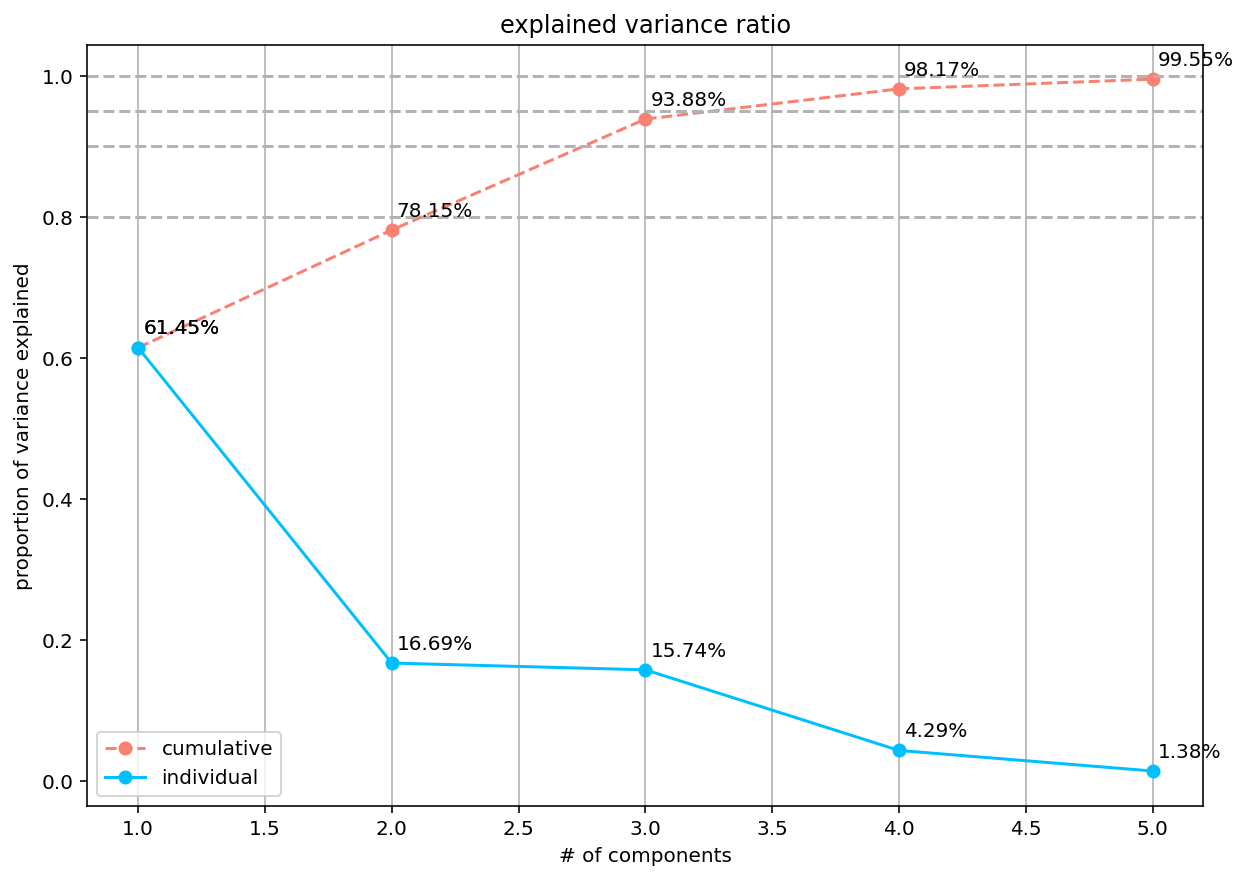

In [13]:
scree_plot(X, 5, True, True)

In [14]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=Data[feature].columns,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Zn,-0.247900,0.757600,-0.094700,-0.366900,0.344600,0.318000,0.034100
Na,-0.398300,0.391100,0.069500,0.646900,0.010300,-0.499700,0.123700
Malic_acid,-0.419900,-0.396000,0.103900,0.082900,0.678500,0.053600,-0.431200
Total_Flavonoid,-0.431500,-0.298900,-0.272500,0.151400,-0.030700,0.431500,0.663400
Total_phenol,-0.306000,-0.001700,-0.727500,-0.041000,-0.376900,-0.038600,-0.481600
Propionic_acid,-0.432100,-0.155400,0.176400,-0.641600,-0.131600,-0.534200,0.209100
Quinic_acid,-0.370300,0.052200,0.583800,0.062100,-0.510300,0.416300,-0.286100


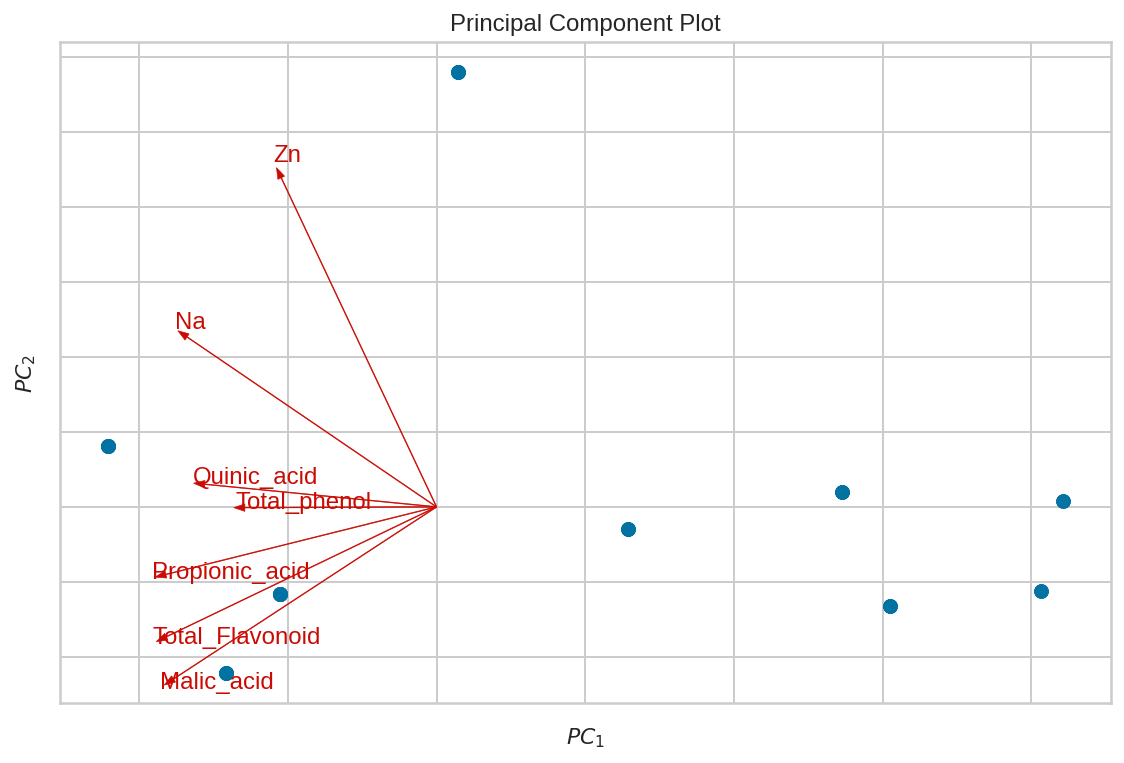

In [15]:
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

In [16]:
pca1 = PCA(n_components= 2)
components = pca1.fit_transform(X_t)
fig = px.scatter(components, x = 0, y = 1, color = Data['Groupping'])
fig.show()

In [17]:
pca = PCA(n_components=2)

X_pca=pca.fit_transform(X_t)

X_pca

array([[-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-1.05461164, -0.5820405 ],
       [-2.21065291,  0.40841326],
       [-2.21065291,  0.40841326],
       [-2.21065291,  0.40841326],
       [-2.21065291,  0.40841326],
       [-2.21065291,  0.40841326],
       [-2.21065291,  0.40841326],
       [-2.21065291,  0.40841326],
       [-2.21065291,  0.40841326],
       [-2.21065291,

In [18]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              Data[['Groupping']]], axis = 'columns')

dd

,PC1,PC2,Groupping
0,-1.054612,-0.582040,1
1,-1.054612,-0.582040,1
2,-1.054612,-0.582040,1
3,-1.054612,-0.582040,1
4,-1.054612,-0.582040,1
...,...,...,...
64,4.064134,-0.558559,6
65,4.064134,-0.558559,6
66,4.211296,0.039195,6
67,4.211296,0.039195,6


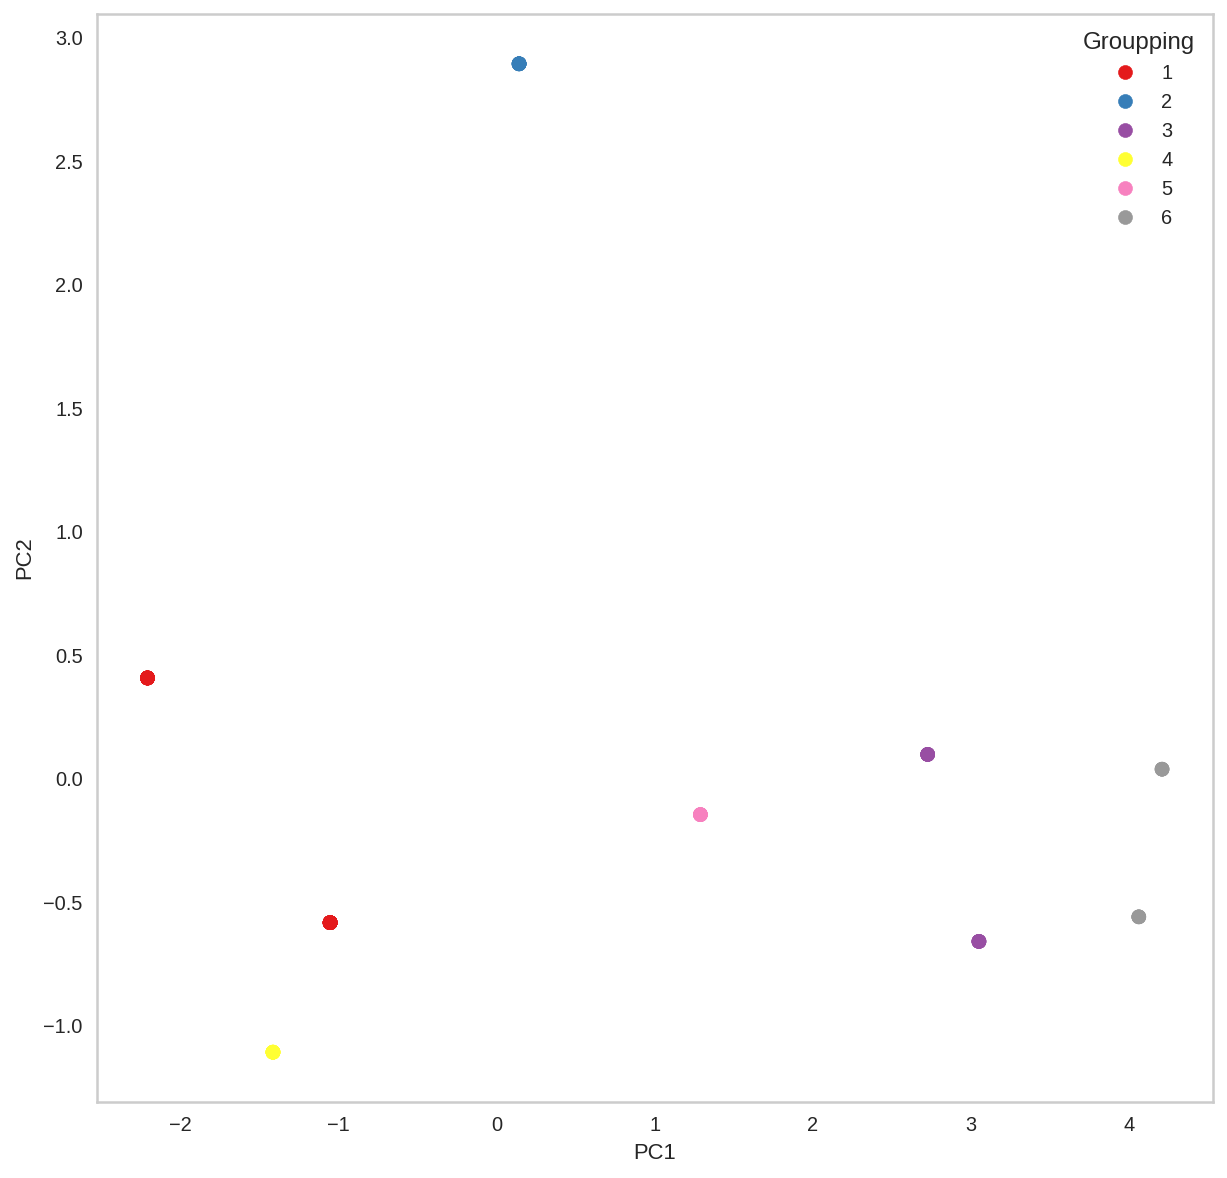

In [19]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(dd['PC1'],dd['PC2'],cmap='Set1', c=Data.Groupping.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(b=None)
plt.legend(handles=scatter.legend_elements()[0], 
           labels = ['1','2','3','4','5','6'],
           title = "Groupping")
plt.show()